In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_curve, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
df['Engine Size(L)']

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
7380    2.0
7381    2.0
7382    2.0
7383    2.0
7384    2.0
Name: Engine Size(L), Length: 7385, dtype: float64

In [3]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
df["Make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

# Data visualization¶

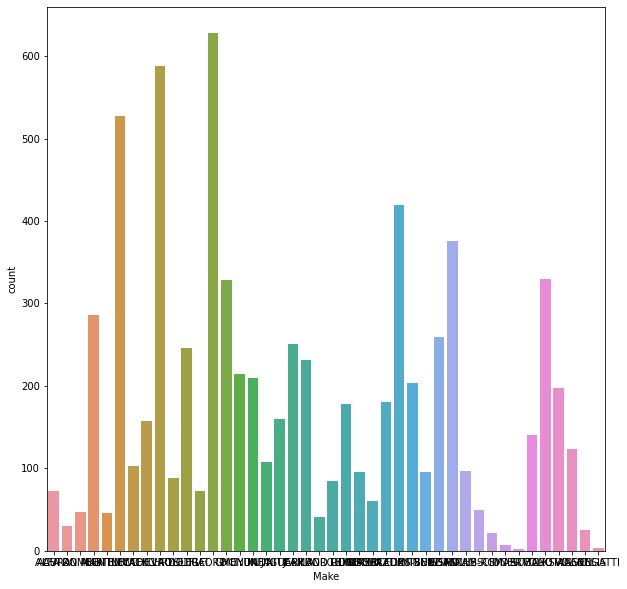

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["Make"])
plt.show()

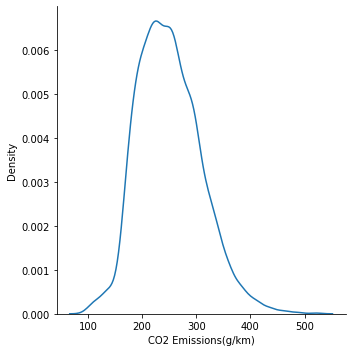

In [8]:
sns.displot(x=df["CO2 Emissions(g/km)"], kind="kde")

<AxesSubplot:xlabel='Vehicle Class', ylabel='count'>

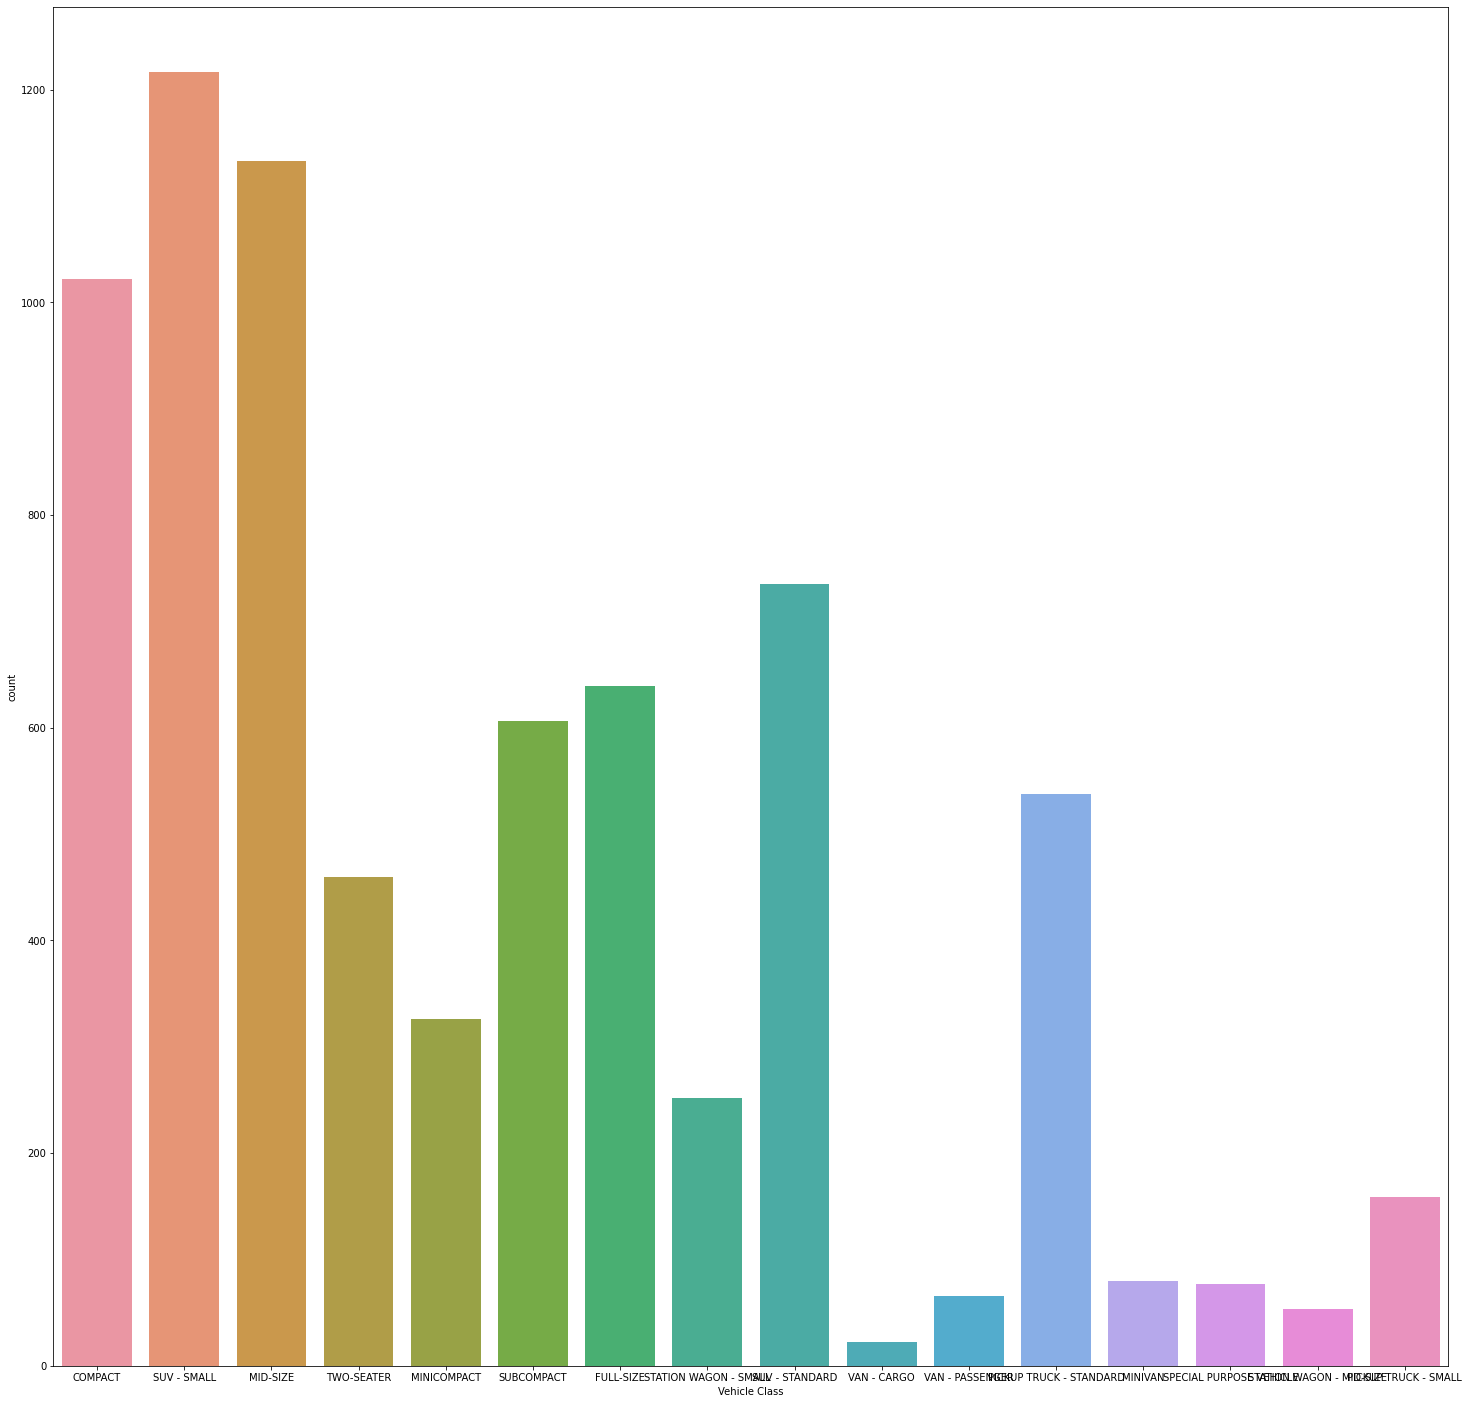

In [9]:
plt.figure(figsize=(25,25))
sns.countplot(x=df["Vehicle Class"])

array([[<AxesSubplot:title={'center':'Engine Size(L)'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel Consumption City (L/100 km)'}>],
       [<AxesSubplot:title={'center':'Fuel Consumption Hwy (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (mpg)'}>],
       [<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

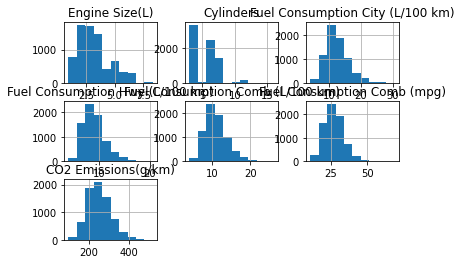

In [10]:
df.hist()

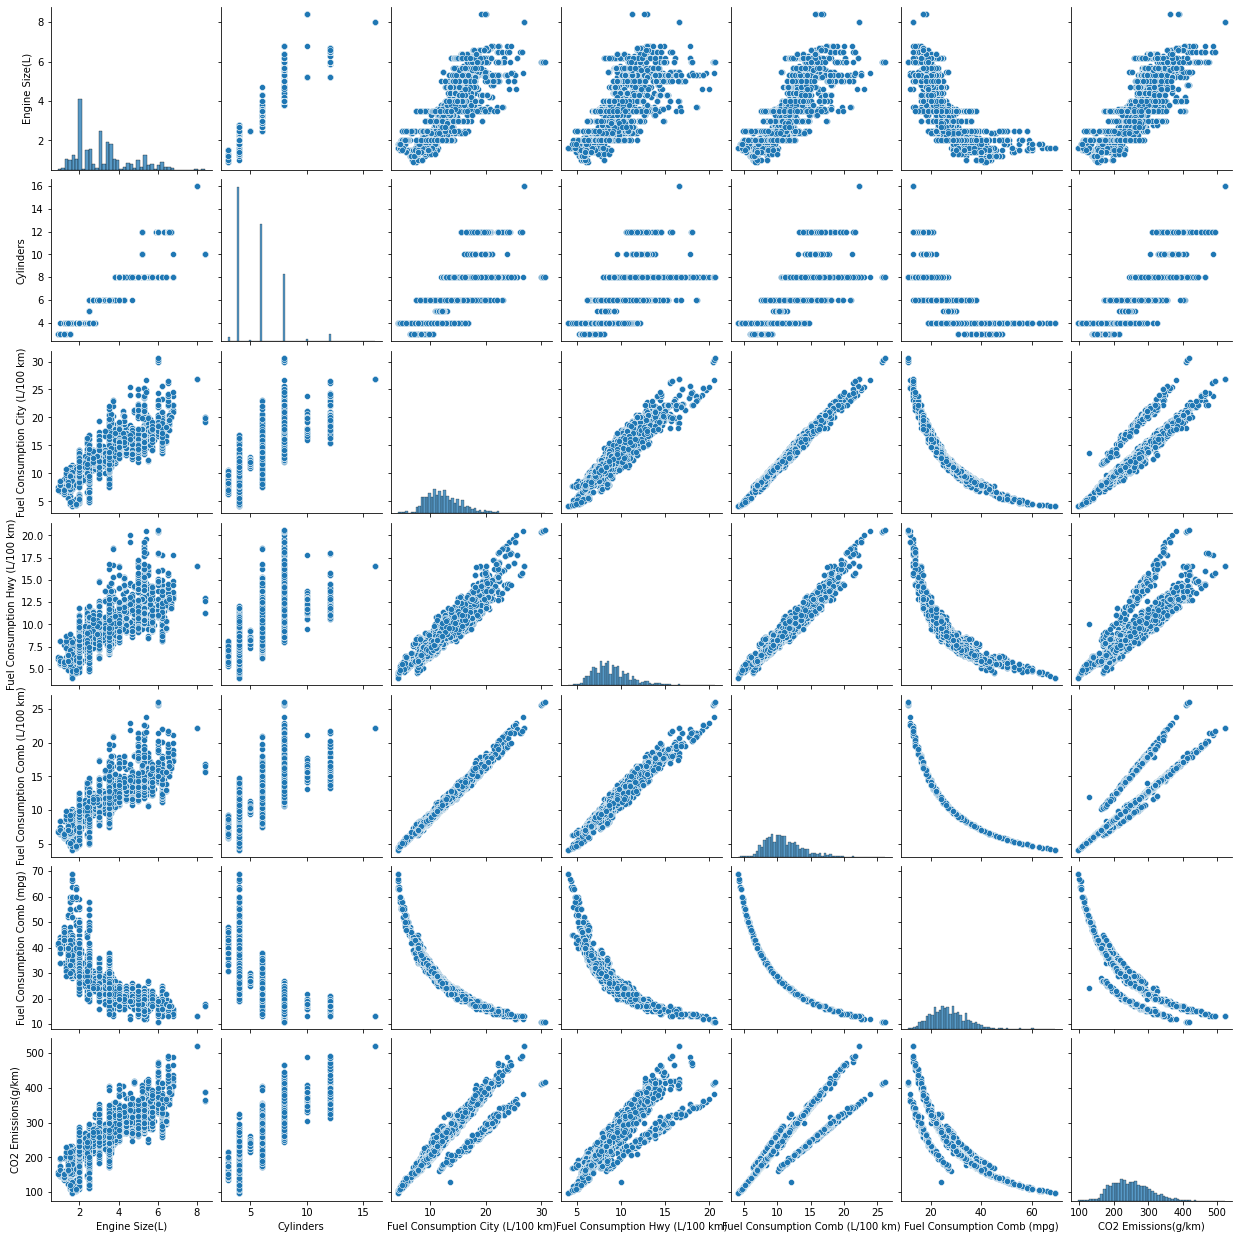

In [11]:
sns.pairplot(df)

In [12]:
target = []
for i in df.columns:
    col = df[i]
    if type(col[0]) == str:
        target.append(i)
        print(i)

Make
Model
Vehicle Class
Transmission
Fuel Type


In [13]:
# from sklearn.preprocessing import LabelEncoder
# for i in target:
#     encoder = LabelEncoder()
#     encoder.fit(list(df[i]))
#     df[i] = encoder.fit_transform(df[i])

In [14]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

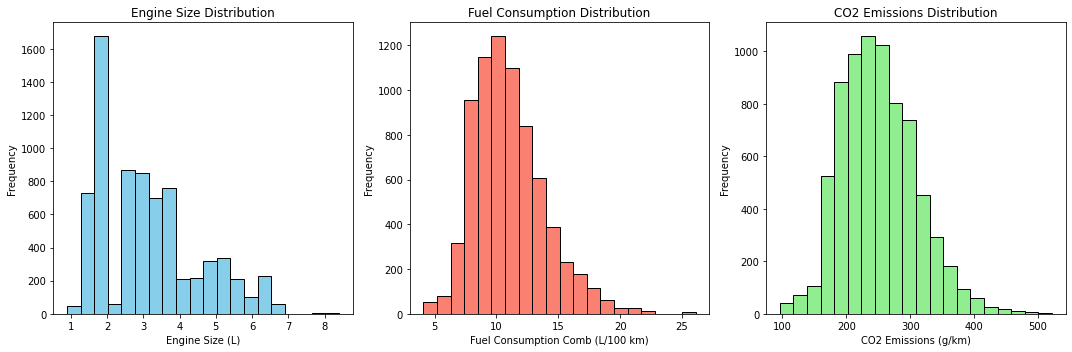

In [6]:
# Create a figure and axis object
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for Engine Size, Fuel Consumption, and CO2 Emissions
axs[0].hist(df['Engine Size(L)'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Engine Size Distribution')
axs[0].set_xlabel('Engine Size (L)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Fuel Consumption Comb (L/100 km)'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Fuel Consumption Distribution')
axs[1].set_xlabel('Fuel Consumption Comb (L/100 km)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['CO2 Emissions(g/km)'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('CO2 Emissions Distribution')
axs[2].set_xlabel('CO2 Emissions (g/km)')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

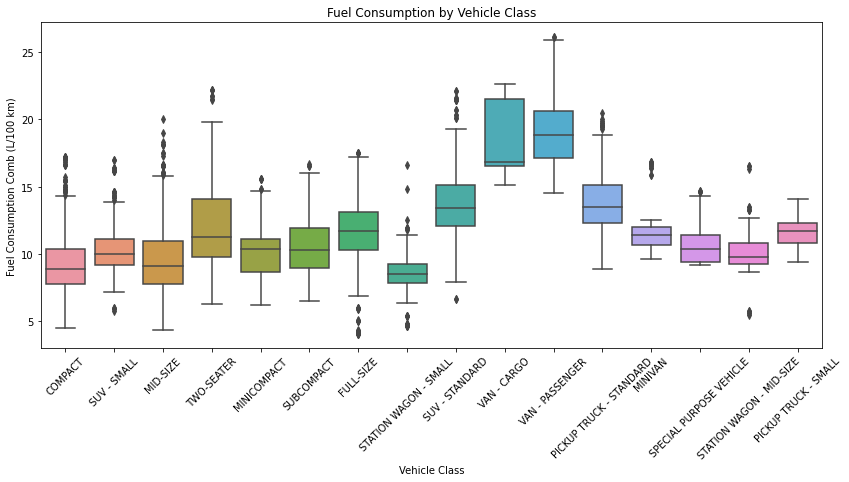

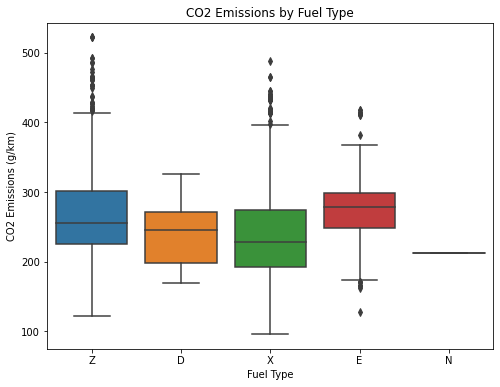

In [13]:
# Create box plot for Fuel Consumption across different vehicle classes
plt.figure(figsize=(14, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.xticks(rotation=45)
plt.show()

# Create box plot for CO2 Emissions across different fuel types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

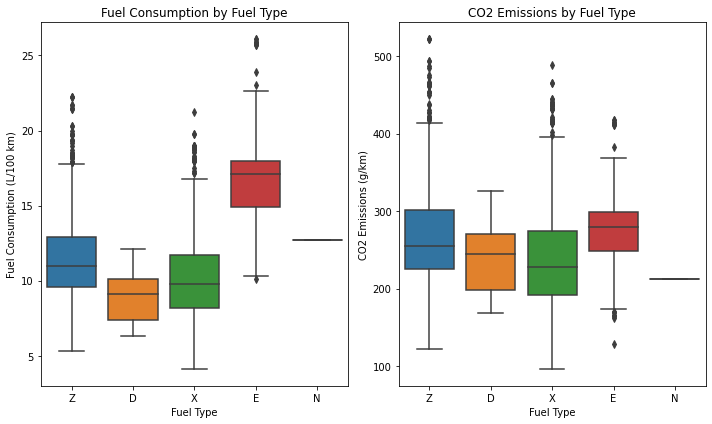

In [8]:
# Create box plots for fuel consumption and CO2 emissions by fuel type
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

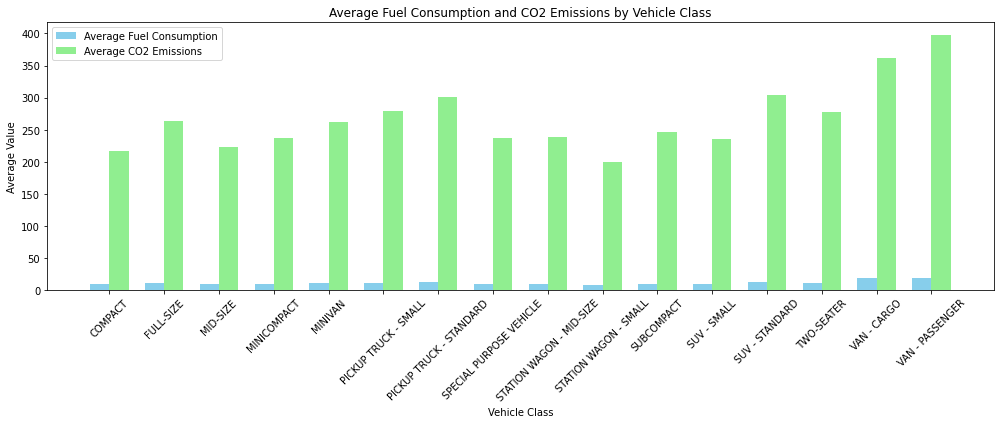

In [14]:
# Group by vehicle class and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()

# Get the position of each vehicle class
x = range(len(avg_fuel_consumption_class))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(x, avg_fuel_consumption_class, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_class, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Vehicle Class')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_class.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

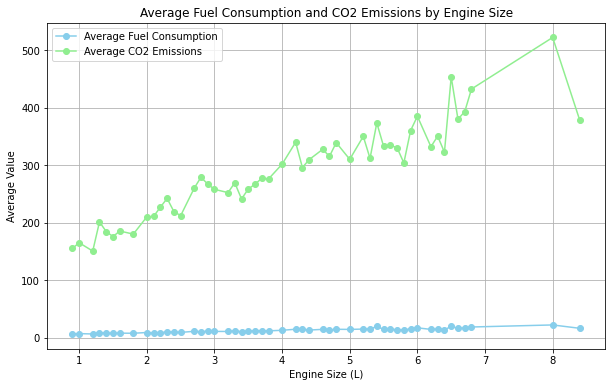

In [10]:
# Group by engine size and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_engine = df.groupby('Engine Size(L)')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_engine = df.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fuel_consumption_engine.index, avg_fuel_consumption_engine, marker='o', label='Average Fuel Consumption', color='skyblue')
plt.plot(avg_co2_emissions_engine.index, avg_co2_emissions_engine, marker='o', label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Engine Size')
plt.legend()
plt.grid(True)
plt.show()

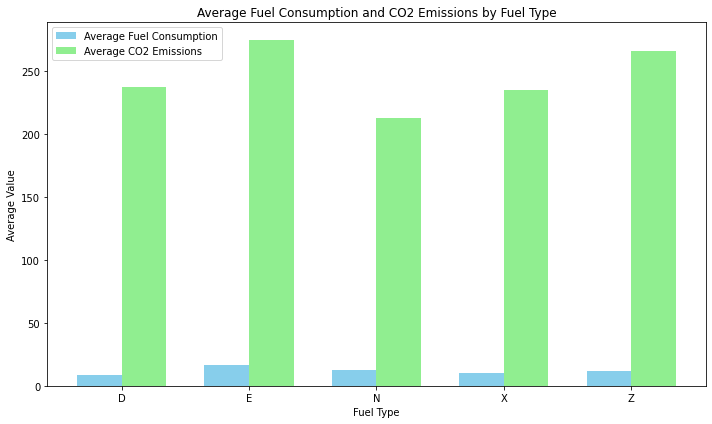

In [11]:
# Group by fuel type and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_fuel = df.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_fuel = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

# Get the position of each fuel type
x = range(len(avg_fuel_consumption_fuel))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, avg_fuel_consumption_fuel, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_fuel, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Fuel Type')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Fuel Type')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_fuel.index)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
X = df.drop("CO2 Emissions(g/km)", axis=1)
y = df["CO2 Emissions(g/km)"]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=41)

# LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

In [19]:
y_predLR = LR.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

accLR = r2_score(y_test, y_predLR)
accLR

0.9214703784055315

In [24]:
mse = mean_squared_error(y_test, y_predLR)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 254.7247487624169


In [25]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 15.960098645134275


In [27]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predLR)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 10.55800312542469


# RandomForest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(x_train, y_train)

In [17]:
y_predRF = RF.predict(x_test)

In [18]:
accRF = r2_score(y_test,y_predRF)
accRF

0.9978392678316551

In [19]:
mse = mean_squared_error(y_test, y_predRF)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7.008717825825923


In [20]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.6473983126507283


In [21]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predRF)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.726745386479511


In [22]:
y_predRF

array([328.98333333, 248.58386167, 230.84380952, ..., 286.039     ,
       339.0185    , 309.30565801])

In [23]:
y_predRF = pd.DataFrame(RF.predict(x_test),columns=['pred'],index=x_test.index)

In [24]:
y_predRF

,pred
5653,328.983333
5242,248.583862
2681,230.843810
7182,355.820000
4149,213.656329
...,...
6918,167.061143
3214,225.849001
2543,286.039000
1561,339.018500


# KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)

In [38]:
y_predKNN = KNN.predict(x_test)

In [41]:
accknn = r2_score(y_test,y_predKNN)
accknn

0.921154130117517

In [42]:
mse = mean_squared_error(y_test, y_predKNN)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 255.7505561466293


In [43]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 15.992202979784533


In [44]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predKNN)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 11.04236386497727


# SVR

In [49]:
from sklearn.svm import SVR
svr = SVR(kernel='linear') 

In [50]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [51]:
y_pred_svr = svr.predict(x_test)

In [52]:
svr_acc = r2_score(y_test,y_pred_svr)
svr_acc

0.8280129260449901

In [53]:
mse = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 557.870562904367


In [54]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 23.61928370853712


In [55]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7.876469782510169


# ElasticNet

In [57]:
from sklearn.linear_model import ElasticNet

In [83]:
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mixing parameter between L1 and L2 penalties (L1 ratio of 0 corresponds to Ridge, 1 to Lasso)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [84]:
y_pred_elastic = elastic_net.predict(x_test)
elastic_acc = r2_score(y_test,y_pred_elastic)
elastic_acc

0.9214993108501732

In [85]:
mse = mean_squared_error(y_test, y_pred_elastic)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred_elastic)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 254.63090124930247
Root Mean Squared Error (RMSE): 15.957158307458833
Mean Absolute Error (MAE): 10.52948762958881


# xgboost

In [64]:
import xgboost as xgb

In [65]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # 'reg:squarederror' for regression
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [68]:
y_pred_xgb = xgb_reg.predict(x_test)
elastic_acc = r2_score(y_test,y_pred_xgb)
elastic_acc

0.9976127828521141

In [69]:
mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 7.743362006463624
Root Mean Squared Error (RMSE): 2.782689707183254
Mean Absolute Error (MAE): 1.7869444364781466


# LightGBM

In [70]:
import lightgbm as lgb

In [71]:
lgb_reg = lgb.LGBMRegressor(random_state=42)  
lgb_reg.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 5908, number of used features: 11
[LightGBM] [Info] Start training from score 251.090047


LGBMRegressor(random_state=42)

In [72]:
y_pred_lgb = lgb_reg.predict(x_test)
lgb_acc = r2_score(y_test,y_pred_lgb)
lgb_acc

0.9968750201735205

In [73]:
mse = mean_squared_error(y_test, y_pred_lgb)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred_lgb)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 10.136426039313774
Root Mean Squared Error (RMSE): 3.1837754379531504
Mean Absolute Error (MAE): 2.079702773015103


# BayesianRidge

In [74]:
from sklearn.linear_model import BayesianRidge
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(x_train, y_train)

BayesianRidge()

In [75]:
y_pred = bayesian_ridge.predict(x_test)

In [76]:
by_acc = r2_score(y_test,y_pred)
by_acc

0.9214609656694652

In [77]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 254.75528064046426
Root Mean Squared Error (RMSE): 15.961055123031944
Mean Absolute Error (MAE): 10.55933214847194


# All models accuracy.

In [92]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["Linear Regression", "Random Forest",
                                                  "KNN","SVR","ElasticNet","xgboost","LightGBM","BayesianRidge"])
models = {'Linear Regression' : LR, 'Random Forest' : RF, 'KNN' : KNN, 'SVR' : svr, 'ElasticNet': elastic_net,
         'xgboost': xgb_reg, 'LightGBM': lgb_reg, 'BayesianRidge': bayesian_ridge}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(y_test, y_pred = model.predict(x_test))

In [93]:
allacc

,Accuracy
Linear Regression,0.92147
Random Forest,0.997839
KNN,0.921154
SVR,0.828013
ElasticNet,0.921499
xgboost,0.997613
LightGBM,0.996875
BayesianRidge,0.921461


<AxesSubplot:title={'center':'Final models accuracy'}>

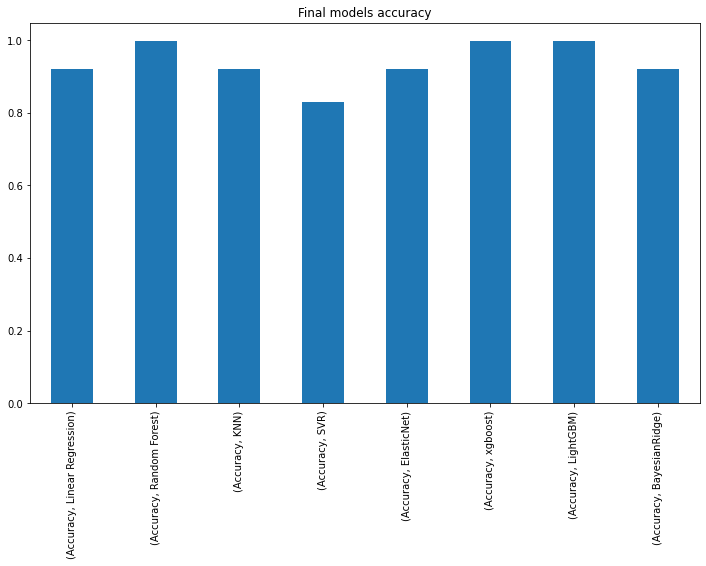

In [94]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')

In [33]:
pip install numpy==1.25

   ---------------------------------------- 15.0/15.0 MB 587.2 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygam 0.9.1 requires scipy<1.12,>=1.11.1; python_version >= "3.9" and python_version < "3.13", but you have scipy 1.13.0 which is incompatible.
pymovie 3.9.7 requires numpy<=1.23.1, but you have numpy 1.25.0 which is incompatible.
shapash 2.4.3 requires scikit-learn<1.4,>=1.0.1, but you have scikit-learn 1.4.2 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

# Explainable AI

# Shapash

In [25]:
from shapash import SmartExplainer

In [37]:
xpl = SmartExplainer(
    model=RF,
#     raw_index=1,
)

In [38]:
xpl.compile(x=x_test,
 y_pred=y_predRF,
 y_target=y_test, # Optional: allows to display True Values vs Predicted Values
 )

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x000001C8918681F0>


In [39]:
%matplotlib inline

In [40]:
xpl.plot.features_importance()

In [41]:
app = xpl.run_app(title_story='Vehicle Carbon dioxide emission')

INFO:root:Your Shapash application run on http://DESKTOP-C26S2U3:8050/
INFO:root:Use the method .kill() to down your app.
Exception in thread Thread-27 (<lambda>):
Traceback (most recent call last):
  File "C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
OSError: [WinError 10049] The requested address is not valid in its context

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py", line 703, i

In [31]:
predictor = xpl.to_smartpredictor()

In [32]:
predictor.save('./predictor.pkl')

In [30]:
xpl.plot.compare_plot(row_num=[0, 1, 2, 3, 4,5,6], max_features=11)

In [33]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./predictor.pkl')

In [34]:
predictor_load.add_input(x=X, ypred=y)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x00000177F9736530>


In [35]:
detailed_contributions = predictor_load.detail_contributions()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x00000177F9736530>


In [116]:
detailed_contributions.head()

,CO2 Emissions(g/km),Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,196,-0.051434,-0.183367,-0.016106,-1.175631,-0.251847,0.007060,1.134767,1.063471,-0.584230,-50.676001,-3.489902
1,221,0.147762,-0.058160,-0.124874,-1.190640,-0.285131,-0.041932,0.873417,0.188420,-0.467824,-25.292230,-2.907494
2,136,-0.082133,0.027259,0.023789,-1.195786,-0.255947,-0.074172,1.272811,-8.837313,-0.497537,-91.581503,-13.154939
3,255,-0.388852,-0.033852,-0.111945,-0.154254,-0.310201,-0.156710,1.666166,-0.030469,-0.741765,1.426418,3.229508
4,244,0.027594,-0.041113,-0.018124,-0.291969,-0.252674,-0.018689,0.828830,0.140358,-0.345847,-3.239810,-2.659820


In [117]:
predictor_load.modify_mask(max_contrib=3)

In [130]:
# explnation = predictor_load.summarize()

In [ ]:
explnation.head()

# ELi5 Explain it like I am 5

In [119]:
import eli5
eli5.show_weights(RF)

Weight,Feature
0.8241 ± 0.3843,x9
0.0937 ± 0.3890,x10
0.0620 ± 0.0179,x6
0.0127 ± 0.0185,x7
0.0036 ± 0.0347,x4
0.0012 ± 0.0019,x3
0.0012 ± 0.0029,x8
0.0004 ± 0.0002,x1
0.0004 ± 0.0011,x2
0.0004 ± 0.0006,x0


In [120]:
eli5.show_weights(RF,top=10)

Weight,Feature
0.8241 ± 0.3843,x9
0.0937 ± 0.3890,x10
0.0620 ± 0.0179,x6
0.0127 ± 0.0185,x7
0.0036 ± 0.0347,x4
0.0012 ± 0.0019,x3
0.0012 ± 0.0029,x8
0.0004 ± 0.0002,x1
0.0004 ± 0.0011,x2
0.0004 ± 0.0006,x0


In [122]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [123]:
class_names = y.unique()
feature_names = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']

In [124]:
#clearly define feature names
eli5.show_weights(RF, feature_names=feature_names, target_names=class_names)

Weight,Feature
0.8241 ± 0.3843,Fuel Consumption Comb (L/100 km)
0.0937 ± 0.3890,Fuel Consumption Comb (mpg)
0.0620 ± 0.0179,Fuel Type
0.0127 ± 0.0185,Fuel Consumption City (L/100 km)
0.0036 ± 0.0347,Cylinders
0.0012 ± 0.0019,Engine Size(L)
0.0012 ± 0.0029,Fuel Consumption Hwy (L/100 km)
0.0004 ± 0.0002,Model
0.0004 ± 0.0011,Vehicle Class
0.0004 ± 0.0006,Make


In [121]:
eli5.explain_weights(RF)

Weight,Feature
0.8241 ± 0.3843,x9
0.0937 ± 0.3890,x10
0.0620 ± 0.0179,x6
0.0127 ± 0.0185,x7
0.0036 ± 0.0347,x4
0.0012 ± 0.0019,x3
0.0012 ± 0.0029,x8
0.0004 ± 0.0002,x1
0.0004 ± 0.0011,x2
0.0004 ± 0.0006,x0


In [127]:
# #For a single prediction
# eli5.show_prediction(RF, x_test.iloc[6], feature_names=feature_names, target_names=class_names)